# Extraer información comprensible para el ser humano de cualquier modelo de aprendizaje automático

![](https://miro.medium.com/max/639/1*tX9jrdkCZm3jPqG0rWXwOQ.png)
Fuente: interpretable-ml-book](https://christophm.github.io/interpretable-ml-book/terminology.html)

En su libro ['Interpretable Machine Learning'](https://christophm.github.io/interpretable-ml-book/), Christoph Molnar encapsula maravillosamente la esencia de la interpretabilidad del ML a través de este ejemplo: Imagina que eres un científico de datos y en tu tiempo libre intentas predecir dónde irán tus amigos de vacaciones en verano basándote en sus datos de facebook y twitter que tienes. Si las predicciones resultan acertadas, tus amigos podrían quedar impresionados y considerarte un mago capaz de ver el futuro.


Si las predicciones son erróneas, no supondría ningún daño para nadie, excepto para tu reputación de "científico de datos". Ahora digamos que no era un proyecto divertido y que había inversiones de por medio. Digamos que querías invertir en propiedades en las que era probable que tus amigos fueran de vacaciones. ¿Qué pasaría si las predicciones del modelo fueran erróneas? Mientras el modelo no tenga un impacto significativo, su interpretabilidad no importa tanto, pero cuando hay implicaciones basadas en la predicción de un modelo, ya sea financiero o social, la interpretabilidad se vuelve relevante.


## Importancia de la Interpretabilidad

La pregunta que suelen hacerse algunas personas es porqué no nos conformamos con los resultados del modelo y porqué nos empeñamos en saber la razón de porqué se ha tomado una determinada decisión. Gran parte de esto tiene que ver con el impacto que un modelo puede tener en el mundo real. Los modelos que sólo sirven para recomendar películas tendrán un impacto mucho menor que los creados para predecir el resultado de una vacuna.

![](https://miro.medium.com/max/1000/0*IWLWbvl2xUJLD-va.png)

[The big picture of explainable machine learning.](https://christophm.github.io/interpretable-ml-book/agnostic.html)

# Técnicas de interpretabilidad en modelos de ML

Vamos a discutir algunas técnicas que ayudan a extraer las ideas anteriores de un modelo. Estas técnicas, en el orden en que se discuten, son las siguientes:

<div class="alert alert-block alert-info">

<h4>ELI5 library</h3>
<h4>Partial Dependence Plots</h3>
<h4>Skater Model Interpretation</h3>
<h4>LIME</h3>
<h4>SHAP Values</h3>
<h4>SHAP Summary Plots</h3>
<h4>FairML</h3>
</div>




## Objetivo

El objetivo del notebook es utilizar técnicas para explicar cómo las diferentes características tienen un efecto diferente en la predicción de si un paciente tiene o no diabetes.

In [1]:
### Bibliotecas básicas de gestión de datos
import pandas as pd
import numpy as np

### Bibliotecas gráficas
import matplotlib.pyplot as plt
import seaborn as sns 

### Utilidades Scikit-learn 
from sklearn.model_selection import train_test_split

### Métricas
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, auc

### Modelos
from xgboost import XGBClassifier, plot_importance
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Módulos sklearn para métricas de rendimiento
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

# Módulos sklearn para selección de modelo de ML
from sklearn import model_selection
from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


########################################################
### Para un flujo de trabajo más rápido, las bibliotecas de Interpretabilidad
### se instalarán/cargarán sobre la marcha del tutorial
########################################################

### Add-ons adicionales
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline

## Conjunto de datos

Los conjuntos de datos constan de varias variables médicas predictoras y una variable objetivo, el resultado. Las variables predictoras incluyen el número de embarazos que ha tenido la paciente, su IMC, su nivel de insulina, su edad, etc.

https://www.kaggle.com/uciml/pima-indians-diabetes-database

### Clases:
- Clase 1: normal (500) (65,10%)
- Clase 2: diabetes de indios Pima (268) (39,89%)

### Variables
- Feature 1: Number of times pregnant (Pregn).
- Feature 2: Plasma glucose concentration a 2 h in an oral glucose tolerance test (Gluco).
- Feature 3: Diastolic blood pressure (mm Hg) (Diasp).
- Feature 4: Triceps skin fold thickness (mm) (Thick).
- Feature 5: 2-h serum insulin (lU/ml)(Insul).
- Feature 6: Body mass index (weight in kg/(heightinm).
- Feature 7: Diabetes pedigree function (Predf).
- Feature 9: Age (years) (Age).
- Class: Diabetes onset within five years (0 or l)(Yes or No) 

#### Español
- Rasgo 1: Número de veces que ha estado embarazada (Pregn).
- Rasgo 2: concentración de glucosa en plasma a las 2 h en una prueba de tolerancia a la glucosa oral (Gluco).
- Rasgo 3: presión arterial diastólica (mm Hg) (Diasp).
- Rasgo 4: grosor del pliegue cutáneo del tríceps (mm) (Thick).
- Rasgo 5: insulina sérica de 2 horas (lU/ml) (Insul).
- Rasgo 6: Índice de masa corporal (peso en kg/(alturaenm).
- Rasgo 7: Diabetes pedigree function (una función que puntúa la probabilidad de padecer diabetes en función de los antecedentes familiares)
- Rasgo 9: Edad (años) (Age).
- Clase: Variable de clase (0 si no es diabético, 1 si es diabético) 

In [2]:
# Carga del dataset en un dataframe
df = pd.read_csv('./data/diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [4]:
# Tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Estadísticas descriptivas
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

Existen valores como el número de embarazos (Pregnancies) que puede tener como valor mínimo el 0, pero las características como Glucose, BloddPresure, SkinThickness, BMI, Insulin no pueden tener como valor mínimo el 0. Tendremos que valorar qué hacemos con estos datos.

In [6]:
# Haremos por seguridad una copia del marco de datos original antes de su procesamiento posterior 
diabetes = df.copy()

### Técnicas pre-modelo. Análisis y visualización de datos

El análisis y la visualización de los datos de exploración son las primeras herramientas para interpretar y obtener conocimientos latentes de los datos. Nos ayudan a identificar las características clave y las representaciones significativas, incluso con grandes conjuntos de datos con, por ejemplo, técnicas de reducción de la dimensionalidad (PCA, t-SNE, etc.). 

Las técnicas de interpretabilidad previas al modelo son independientes del modelo, ya que sólo son aplicables a los propios datos. La interpretabilidad pre-modelo suele producirse antes de la selección del modelo, ya que también es importante explorar y tener una buena comprensión de los datos antes de pensar en el modelo. Las características intuitivas significativas y la escasez (bajo número de características) son algunas propiedades que ayudan a lograr la interpretabilidad de los datos.

Así que ahora vamos a hacer un rápido análisis de datos de exploración para ver cómo se distribuyen y correlacionan los datos.

In [7]:
# Extrayendo nuestra variable objetivo 'Outcome'
# y creando una lista de características útiles de las variables dependientes
target = 'Outcome'
features_list = list(diabetes.columns)
features_list.remove(target)
print(features_list)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


### Análisis univariante 

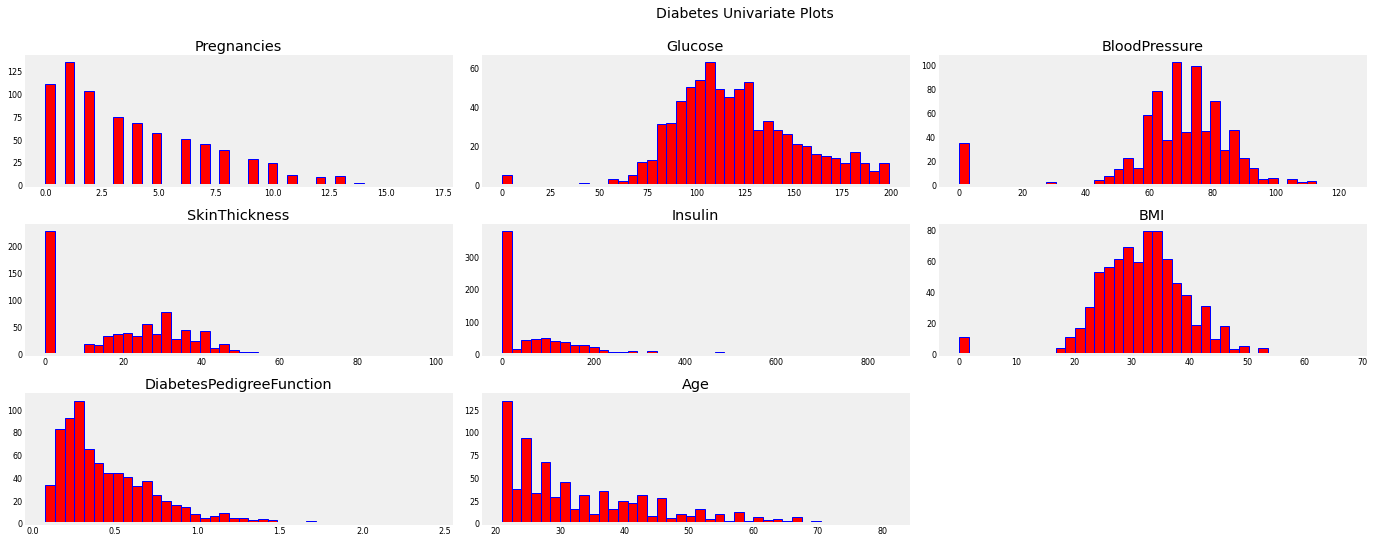

In [8]:
diabetes[features_list].hist(bins=40, edgecolor='b', linewidth=1.0,
                          xlabelsize=8, ylabelsize=8, grid=False, 
                          figsize=(16,6), color='red')    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
plt.suptitle('Diabetes Univariate Plots', x=0.65, y=1.25, fontsize=14);  

Como ya se ha comentado tras la visualización de los estadísticos descriptivos, el gráfico muestra que algunas características, como la insulina y el grosor de la piel, presentan un pico de valores en 0, que no es un valor admisible para dichas características. Así que, probablemente, esos valores se han insertado donde faltaba el valor correspondiente (nan).

Comprobemos cuántos valores 0 hay en el conjunto de datos:

In [9]:
df.drop( "Outcome", axis=1 ).isin( [ 0 ] ).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

Podemos ver que, aparte de DiabetesPedigreeFunction y Edad, todas las demás columnas tienen valores 0. Entre ellas, la única que podría tener valores 0 admisibles es Embarazos. Por lo tanto, consideraré todos los demás valores como ausentes y tendré que tratarlos en la fase de preprocesamiento.

Por ahora, me limitaré a anotar las columnas que presentan valores perdidos y las sustituiré por valores medios de cada columna, para evitar suposiciones erróneas y gráficos sesgados en el siguiente análisis:

In [10]:
# columns_with_missing_values = [ "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI" ]

# for col in columns_with_missing_values:
#     diabetes[ col ] = diabetes[ col ].replace( to_replace=0, value=np.NaN )
# diabetes.describe()

# He cambiado el valor a media, debido a que NaN da errores en PDP / ICE

In [11]:
columns_with_missing_values = [ "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI" ]

for col in columns_with_missing_values:
    diabetes[ col ] = diabetes[ col ].replace( to_replace=0, value=np.mean(diabetes [col] ))
    
print(diabetes)

     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0      35.000000   79.799479  33.6   
1              1     85.0           66.0      29.000000   79.799479  26.6   
2              8    183.0           64.0      20.536458   79.799479  23.3   
3              1     89.0           66.0      23.000000   94.000000  28.1   
4              0    137.0           40.0      35.000000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0      48.000000  180.000000  32.9   
764            2    122.0           70.0      27.000000   79.799479  36.8   
765            5    121.0           72.0      23.000000  112.000000  26.2   
766            1    126.0           60.0      20.536458   79.799479  30.1   
767            1     93.0           70.0      31.000000   79.799479  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627

Comprobemos cómo han cambiado los histogramas tras la sustitución:

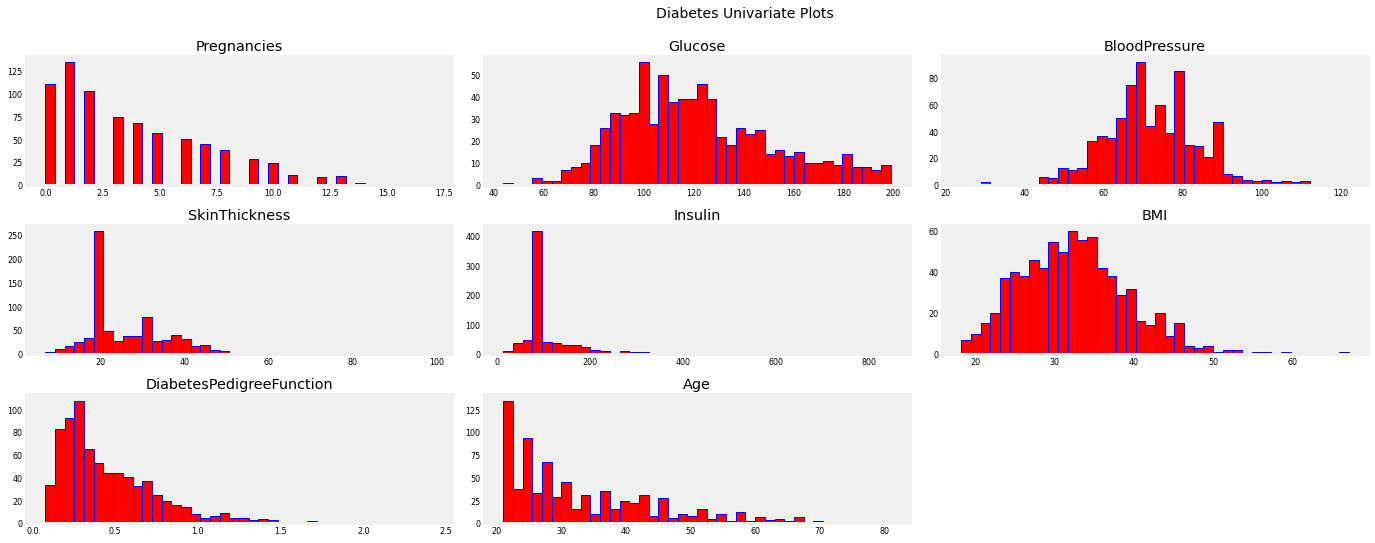

In [12]:
diabetes[features_list].hist(bins=40, edgecolor='b', linewidth=1.0,
                          xlabelsize=8, ylabelsize=8, grid=False, 
                          figsize=(16,6), color='red')    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
plt.suptitle('Diabetes Univariate Plots', x=0.65, y=1.25, fontsize=14);  

In [13]:
diabetes.isin( [ 0 ] ).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

### Distribución de Outcomes

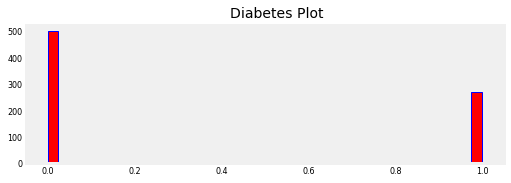

In [14]:
diabetes[target].hist(bins=40, edgecolor='b', linewidth=1.0,
              xlabelsize=8, ylabelsize=8, grid=False, figsize=(6,2), color='red')    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
plt.suptitle('Diabetes Plot', x=0.65, y=1.25, fontsize=14);  

### Análisis multivariante

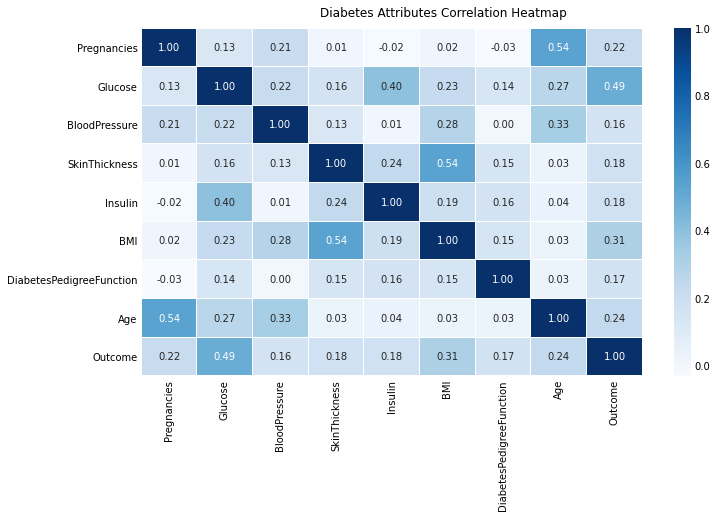

In [15]:
# Visualizamos las correlaciones
f, ax = plt.subplots(figsize=(10, 6))
corr = diabetes.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="Blues",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t = f.suptitle('Diabetes Attributes Correlation Heatmap', fontsize=12)

A partir de la matriz de correlación podemos ver que no hay características altamente correlacionadas, pero todavía hay algunas características que parecen tener algún tipo de relación como sugiere el valor del índice de correlación alrededor de 0,5.

Estas características son:

- Edad - Embarazos: esto es razonable ya que el número de embarazos sólo puede aumentar a medida que aumenta la edad.
- Glucosa - Diabetes: podemos deducir que una mayor concentración de glucosa está relacionada con una mayor probabilidad de ser diagnosticada de diabetes. Esto también se confirma con la información adicional sobre la diabetes que se ha indicado en la introducción.
- Glucosa - Insulina: podemos deducir que cuando hay un mayor nivel de glucosa en la sangre, el cuerpo produce más insulina.
- IMC - Espesor de la piel: las personas con un mayor Índice de Masa Corporal parecen tener una piel más gruesa.

### Características bivariadas frente al resultado

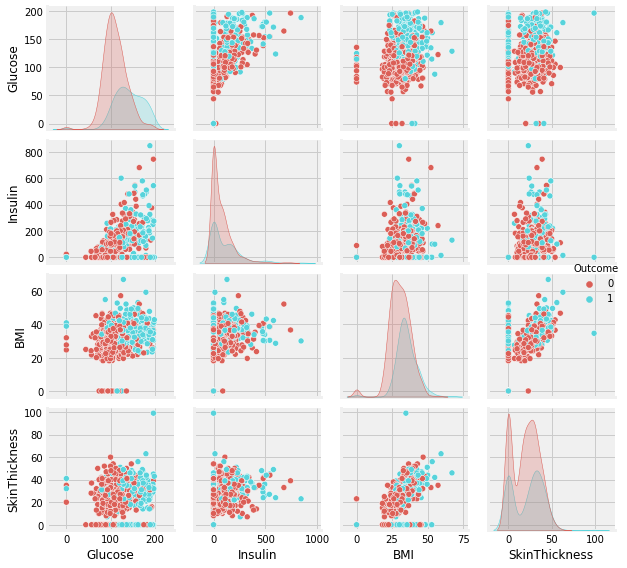

In [16]:
sns.pairplot( df.dropna(), vars=[ 'Glucose', 'Insulin', 'BMI', 'SkinThickness' ], size=2, diag_kind='kde', palette='hls', hue='Outcome' )
plt.tight_layout( )
plt.show()

Como era de esperar, el gráfico confirma lo que hemos descubierto mirando la matriz de correlación: parece haber una relación lineal positiva entre la insulina y la glucosa y también entre el IMC y el grosor de la piel, donde la correlación es aún más clara.

Observando la diagonal también podemos ver la distribución de las características separadas por clase. Podemos ver que las personas con diabetes tienden a tener valores más altos en cada una de esas características.

### Creamos los conjuntos de entrenamiento y test

In [17]:
# Crear el objetivo y la columna de características y dividir el conjunto de datos en conjunto de prueba y de entrenamiento.

X = diabetes.iloc[:, :-1]
y = diabetes.iloc[:, -1]

# 75% para entrenamiento, 25% para test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train.shape, X_test.shape

((576, 8), (192, 8))

### Modelos de Machine Learning
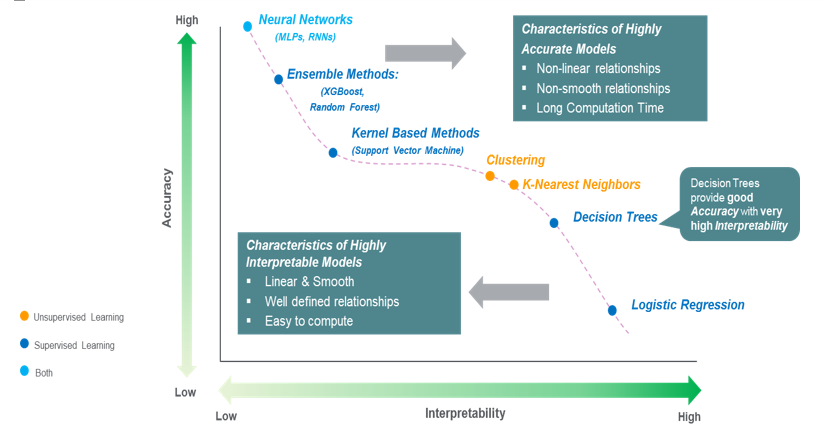

Fuente: https://towardsdatascience.com/interpreting-machine-learning-model-70fa49d20af1

### Probemos con un conjunto de algoritmos de ML

> Utilicemos primero una serie de algoritmos de base (utilizando hiperparámetros de fábrica) antes de pasar a soluciones más sofisticadas. Los algoritmos considerados en esta sección son: **Regresión logística**, **Bosque aleatorio**, **SVM**, **KNN**, **Clasificador de árbol de decisión**, **NB gaussiano**.

In [18]:
# selección de algoritmos a tener en cuenta y establecimiento de medidas de rendimiento
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=7,
                                                         class_weight='balanced')))
models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, random_state=7)))
models.append(('SVM', SVC(gamma='auto', random_state=7)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(random_state=7)))
models.append(('Gaussian NB', GaussianNB()))
models.append(('XGboost', XGBClassifier(objective='binary:logistic', random_state=33, n_jobs=-1)))

In [19]:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']
df_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using cross-validation
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=None)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
df_results.sort_values(by=['ROC AUC Mean'], ascending=False)

[21:41:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:41:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:41:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:41:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

Algorithm  ROC AUC Mean  ROC AUC STD  Accuracy Mean  \
0       Logistic Regression         81.95         5.39          74.82   
1             Random Forest         81.47         5.50          74.46   
5               Gaussian NB         80.98         4.76          73.77   
6                   XGboost         79.62         4.68          73.08   
3                       KNN         74.60         6.29          69.79   
2                       SVM         65.10         7.58          64.25   
4  Decision Tree Classifier         63.15         7.40          66.64   

   Accuracy STD  
0          5.20  
1          5.11  
5          4.36  
6          5.33  
3          6.19  
2          3.97  
4          6.41

### Entrenamos nuestro modelo XGBoost

Si bien, podemos constatar que utilizar un modelo interpretable con Logistic Regression podría darnos unos resultados muy aceptables, con el objetivo de aplicar interpretabilidad, vamos a instanciar y a entrenar un modelo de clasificación XGBoost (baja interpretabilidad) con nuestros datos de entrenamiento.

Un modelo Gradient Boosting está formado por un conjunto de árboles de decisión individuales, entrenados de forma secuencial, de forma que cada nuevo árbol trata de mejorar los errores de los árboles anteriores. La predicción de una nueva observación se obtiene agregando las predicciones de todos los árboles individuales que forman el modelo.

https://www.cienciadedatos.net/documentos/py09_gradient_boosting_python.html 

In [20]:
%%time

# ML en dos líneas ;-)
# eval_metric = 'logloss' 
xgb = XGBClassifier(objective='binary:logistic', random_state=33, n_jobs=-1)
xgb.fit(X_train, y_train, eval_metric = 'logloss')

Wall time: 110 ms


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=33,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Evaluación del rendimiento del modelo

In [21]:
# Realización de predicciones sobre los datos de las pruebas y evaluación del rendimiento
xgb_predictions = xgb.predict(X_test)

In [22]:
# Diseñamos una función de evaluación de clasificación simple
def evaluation_scores(test, prediction, target_names=None):
    print('Precisión:', np.round(metrics.accuracy_score(test, prediction), 4)) 
    print('-'*60)
    print('Informe de clasificación:\n\n', metrics.classification_report(y_true=test, y_pred=prediction, target_names=target_names)) 
    
    classes = [0, 1]
    total_classes = len(classes)
    level_labels = [total_classes*[0], list(range(total_classes))]

    cm = metrics.confusion_matrix(y_true=test, y_pred=prediction, labels=classes)
#    cm_frame = pd.DataFrame(data=cm, columns=pd.MultiIndex(levels=[['Predicted:'], classes], labels=level_labels), index=pd.MultiIndex(levels=[['Actual:'], classes], labels=level_labels))    
    print('-'*60)
    print('Matriz de confusión:\n')
    print(cm) 

https://www.datasource.ai/es/data-science-articles/comprension-de-la-matriz-de-confusion-y-como-implementarla-en-python

In [23]:
# Evaluamos las predicciones
evaluation_scores(y_test, xgb_predictions, target_names=['Diabetes(No)', 'Diabetes(Sí)'])

Precisión: 0.8125
------------------------------------------------------------
Informe de clasificación:

               precision    recall  f1-score   support

Diabetes(No)       0.86      0.86      0.86       130
Diabetes(Sí)       0.71      0.71      0.71        62

    accuracy                           0.81       192
   macro avg       0.79      0.79      0.79       192
weighted avg       0.81      0.81      0.81       192

------------------------------------------------------------
Matriz de confusión:

[[112  18]
 [ 18  44]]


> El modelo XGBoost nos da una precisión muy parecida al modelo de Regresión Logística que habíamos probado con el conjunto de modelos de test.

### Clasificación: ROC y AUC

Una curva ROC (curva de característica operativa del recepto) es un gráfico que muestra el rendimiento de un modelo de clasificación en todos los umbrales de clasificación. Esta curva representa dos parámetros:

- Tasa de verdaderos positivos
- Tasa de falsos positivos

https://stackabuse.com/understanding-roc-curves-with-python/

La curva AUC / ROC es probablemente una mejor evaluación para esta tarea de clasificación:

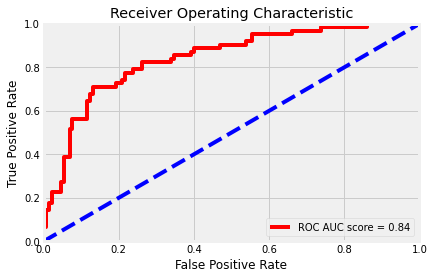

In [24]:
# calcular el FPR y el TPR para todos los umbrales de la clasificación
probs = xgb.predict_proba(X_test)
# Probabilidades positivas
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'red', label = 'ROC AUC score = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

El AUC proporciona una medición agregada del rendimiento en todos los umbrales de clasificación posibles. Una forma de interpretar el AUC es como la probabilidad de que el modelo clasifique un ejemplo positivo aleatorio más alto que un ejemplo negativo aleatorio. 

AUC = 0,84 bueno, no está mal sin ningún tipo de ajuste o ingeniería de características.

Necesitamos un análisis más sofistificado que la simple precisión... Interpretabilidad

# Métodos de interpretación

Los modelos no paramétricos, como los modelos basados en árboles como XGBoost, son más difíciles de interpretar porque su número total de parámetros no es fijo y crecerá con el volumen de datos utilizados para el entrenamiento. Los modelos paramétricos (por ejemplo, la regresión logística) ofrecen, por el contrario, un primer nivel de interpretación a través de sus coeficientes (pero, de hecho, ni siquiera esto es completamente trivial). En ese caso, las técnicas de regularización como L1-regularización/LASSO pueden ser útiles para reducir el espacio de características y mejorar la interpretabilidad del modelo. Para los modelos no paramétricos, afortunadamente, muchos de ellos, como XGBoost, dan acceso a métodos de interpretación como la importancia de las características para ayudarnos a entender la evaluación interna del modelo para hacer sus predicciones.

Para interpretar un modelo, básicamente necesitamos saber

- Qué características son las más importantes en el modelo.
- El efecto de cada característica en una predicción concreta.
- Los efectos de cada característica en un gran número de predicciones.

Los cálculos nativos de la importancia global de las características que vienen con XGBoostare se basan en los siguientes parámetros:

- Peso de las características: se basa en el número de veces que una característica aparece en un árbol en el conjunto de árboles.
- Cobertura: la cobertura media (número de muestras afectadas) de las divisiones que utilizan la característica.
- Ganancia: la ganancia media de las divisiones que utilizan la característica.

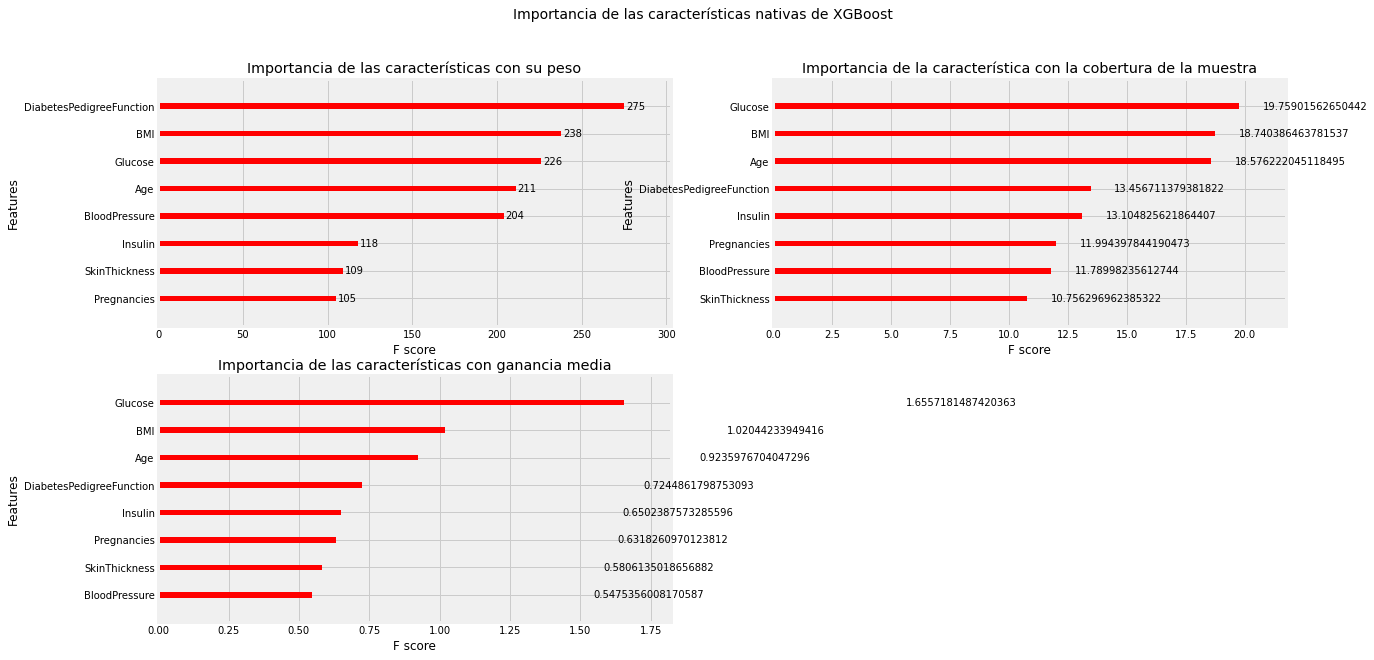

In [25]:
# Trazando la importancia de las características de XGBoost
fig = plt.figure(figsize = (18, 10))
title = fig.suptitle("Importancia de las características nativas de XGBoost", fontsize=14)

ax1 = fig.add_subplot(2, 2, 1)
plot_importance(xgb, importance_type='weight', ax=ax1, color='red')
ax1.set_title("Importancia de las características con su peso");

ax2 = fig.add_subplot(2, 2, 2)
plot_importance(xgb, importance_type='cover', ax=ax2, color='red')
ax2.set_title("Importancia de la característica con la cobertura de la muestra");

ax3 = fig.add_subplot(2, 2, 3)
plot_importance(xgb, importance_type='gain', ax=ax3, color='red')
ax3.set_title("Importancia de las características con ganancia media");

Como se ve, los rasgos se ordenan de distintas maneras según estos diferentes criterios. Necesitamos una forma más coherente de hacerlo. Como veremos más adelante, los valores de Shapley, por ejemplo, nos ofrecen esa forma consistente.

## ELI5 Model Interpretation

Según la documentación, ELI5 ("Explain Like I'm 5") es una librería de Python que ayuda a depurar clasificadores y regresores de aprendizaje automático y a explicar sus predicciones de forma fácil de entender e intuitiva. ELI5 es un buen punto de partida y soporta modelos basados en árboles y paramétricos/lineales y también utilidades de procesamiento de texto y HashingVectorizer de scikit-learn, pero no soporta verdaderas interpretaciones agnósticas del modelo.

¿Qué características considera importantes el modelo?  ¿Qué características pueden tener un mayor impacto en las predicciones del modelo que las demás?  Este concepto se denomina importancia de las características y la **Importancia** es una técnica muy utilizada que nos ayuda a ver cuando nuestro modelo produce resultados contraintuitivos, y ayuda a mostrar a los demás cuando nuestro modelo está funcionando como esperamos.

La Importancia de Permutación funciona para muchos estimadores de scikit-learn. La idea es simple: Permutar o barajar aleatoriamente una sola columna en el conjunto de datos de validación dejando todas las demás columnas intactas.  Una característica se considera "importante" si la precisión del modelo disminuye mucho y provoca un aumento del error. Por otro lado, una característica se considera "no importante" si el hecho de barajar sus valores no afecta a la precisión del modelo.

* La importancia de la permutación es útil para depurar, entender el modelo y comunicar una visión general de alto nivel del modelo.

* La importancia de la permutación se calcula después de que el modelo haya sido ajustado. 

* La importancia de la permutación se calcula utilizando la biblioteca **ELI5**.  **ELI5**] (https://github.com/TeamHG-Memex/eli5) es una biblioteca de Python que permite visualizar y depurar varios modelos de Aprendizaje Automático utilizando una API unificada. Tiene soporte incorporado para varios marcos de ML y proporciona una manera de explicar los modelos de caja negra.

In [26]:
# pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

Con XGBoost, ELI5 se limita a utilizar los mismos métodos nativos de cálculo de las importancias de las características (con el parámetro "gain" por defecto) que acabamos de ver anteriormente y nos da una forma fácil y ergonómica de mostrarlo con el método eli5.show_weights.

In [27]:
eli5.show_weights(xgb.get_booster())

#### Explicación de las decisiones de predicción del modelo con ELI5
Para que las predicciones de los árboles aleatorios sean más interpretables, cada predicción del modelo puede presentarse como una suma de contribuciones de características (más el sesgo), mostrando cómo las características conducen a una predicción particular. ELI5 lo hace mostrando las ponderaciones de cada característica, indicando su influencia en la decisión final de predicción en todos los árboles. Este es un buen paso en la dirección de la interpretación agnóstica del modelo, pero no totalmente agnóstica, como veremos más adelante, utlizando LIME.

In [28]:
%%time

# necesitamos reentrenar un nuevo modelo con arrays
# ya que eli5 tiene un error con Dataframes y XGBoost
# cf. https://github.com/TeamHG-Memex/eli5/pull/261
xgb_array = XGBClassifier(objective='binary:logistic', random_state=33, n_jobs=-1)
xgb_array.fit(X_train, y_train, eval_metric = 'logloss')

Wall time: 74.9 ms


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=33,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [29]:
feat_permut = PermutationImportance(xgb_array, random_state=33).fit(X_train, y_train)
eli5.show_weights(feat_permut, feature_names = features_list)

Como se puede observar, obtenemos de esta forma la importancia de las características con un margen de error. Se puede apreciar que la **Glucosa (Glucose)**, seguida por el **Índice de Masa Corporal (BMI)** y la **edad (Age)** son las principales características que apunta el modelo como predictoras de diabetes.

## Partial Dependence Plots (PD plot)
"El gráfico de dependencia parcial (PD plot) muestra el efecto marginal que tienen una o dos características en el resultado predicho de un modelo de aprendizaje automático (J. H. Friedman 200127). Un gráfico de dependencia parcial puede mostrar si la relación entre el objetivo y una característica es lineal, monótona o más compleja". (de la documentación de PDPbox).

En pocas palabras, mientras que la importancia de las características muestra QUÉ variables afectan más a las predicciones, los gráficos de dependencia parcial muestran CÓMO afecta una característica a las predicciones.

Para más información: https://towardsdatascience.com/introducing-pdpbox-2aa820afd312

In [30]:
# pip install pdpbox
from pdpbox import pdp, get_dataset, info_plots

#print('pdpbox: {}'.format(pdpbox.__version__))

In [31]:
def plot_pdp(model, df, feature, cluster_flag=False, nb_clusters=None, lines_flag=False):
    
    # Crear los datos que vamos a trazar
    pdp_goals = pdp.pdp_isolate(model=model, dataset=df, model_features=df.columns.tolist(), feature=feature)

    # plot it
    pdp.pdp_plot(pdp_goals, feature, cluster=cluster_flag, n_cluster_centers=nb_clusters, plot_lines=lines_flag)
    plt.show()

Veamos cómo se comporta la característica 'Insulin':

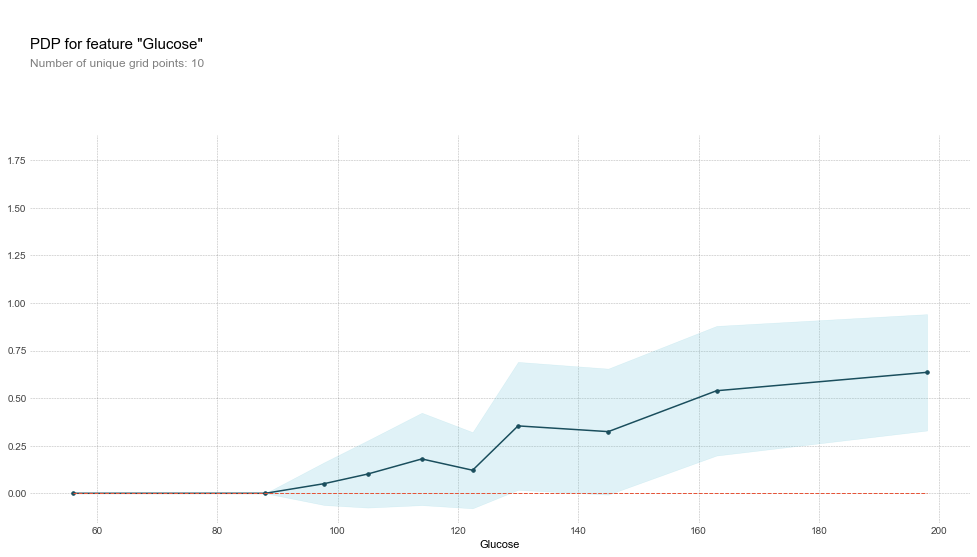

In [32]:
# plot the PD univariate plot
plot_pdp(xgb, X_train, 'Glucose')

Este gráfico PDP nos muestra que el nivel de glucosa parece tener una influencia positiva creciente en la predicción de diabetes para los valores a partir de 130. Después de ese umbral, la influencia crece de forma lineal.

### Gráfico ICE univariante
Los gráficos ICE son similares a los gráficos PD, pero ofrecen una visión más detallada sobre el comportamiento de los conglomerados casi similares en torno a la curva media del gráfico PD. El algoritmo ICE ofrece al usuario una visión de las diversas variantes de relaciones condicionales estimadas por la caja negra.

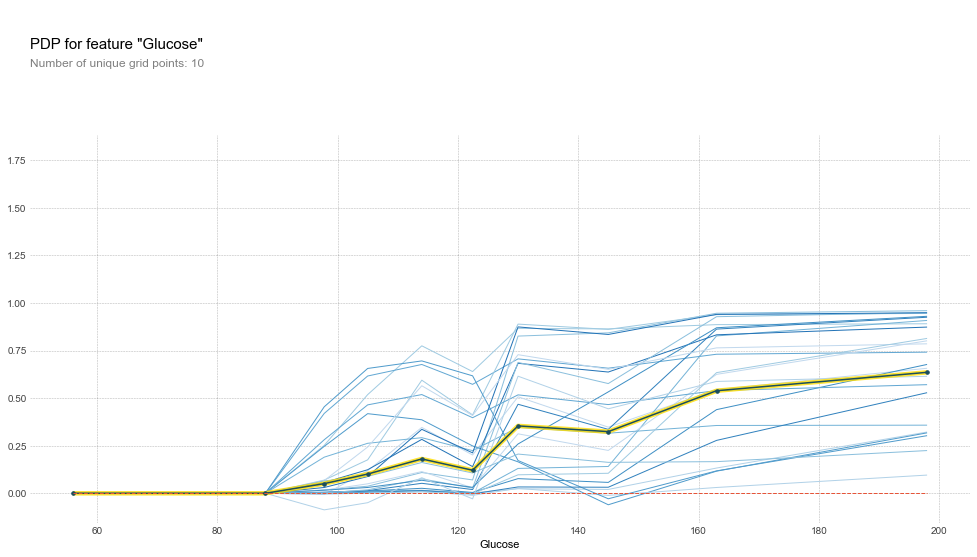

In [33]:
# para el gráfico de ICE debemos especificar el número de clusters de similitud que queremos, 24
plot_pdp(xgb, X_train, 'Glucose', cluster_flag=True, nb_clusters=24, lines_flag=True)

### Gráfico PD bivariante

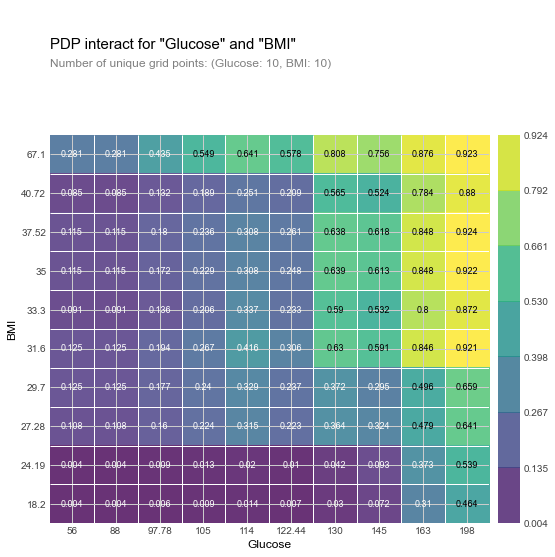

In [34]:
features_to_plot = ['Glucose', 'BMI']
inter1  =  pdp.pdp_interact(model=xgb, dataset=X_train, model_features=features_list, features=features_to_plot)
pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='grid')

plt.show()

## SKATER Model Interpretation
SKATER es un framework MLI relativamente nuevo y la documentación no es fácilmente accesible por ahora. Esta parte está fuertemente inspirada por este artículo y por un extenso y realmente gran tutorial sobre MLI hecho por Dipanjan Sarkar. 

https://towardsdatascience.com/explainable-artificial-intelligence-part-2-model-interpretation-strategies-75d4afa6b739 

"Skater es un marco unificado para permitir la Interpretación de Modelos (post-model) construye un sistema de aprendizaje automático interpretable a menudo necesario para los casos de uso del mundo real utilizando un enfoque agnóstico de modelo. Es una biblioteca de código abierto en python diseñada para desmitificar las estructuras aprendidas de un modelo de caja negra tanto a nivel global (inferencia sobre la base de un conjunto completo de datos) como local (inferencia sobre una predicción individual).

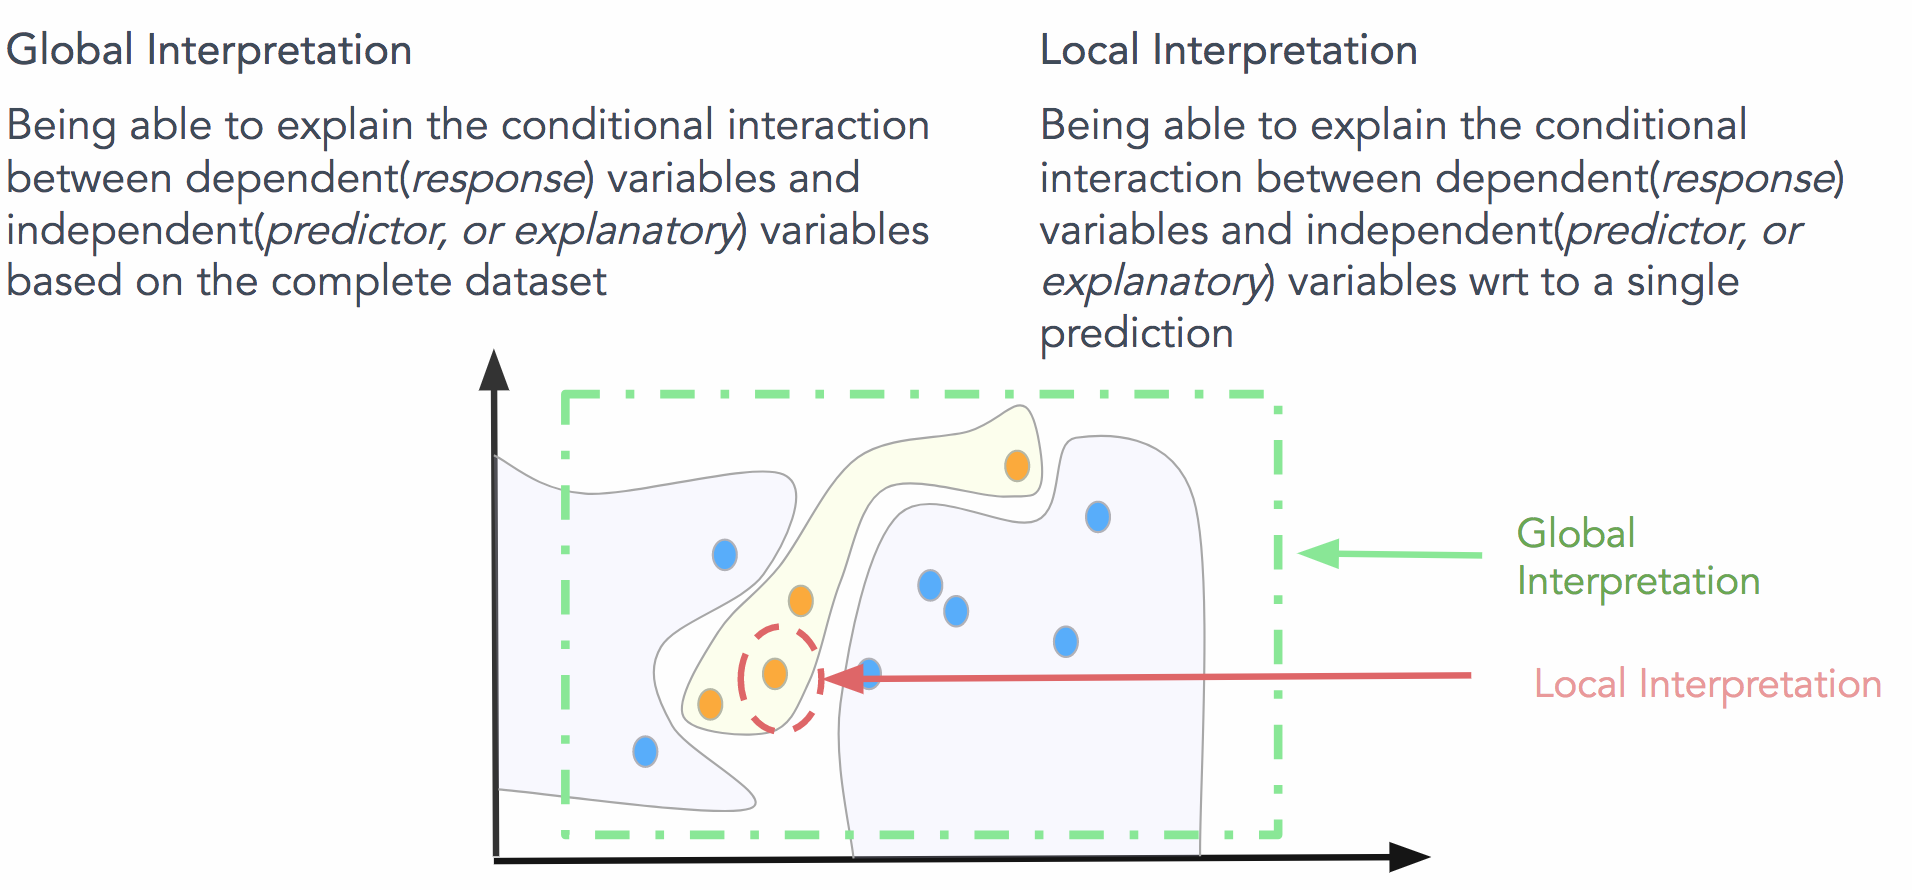

Fuente: https://www.oreilly.com/content/interpreting-predictive-models-with-skater-unboxing-model-opacity/

Skater comenzó originalmente como una bifurcación de LIME, pero luego se convirtió en un marco independiente con una amplia variedad de características y capacidades para la interpretación agnóstica de cualquier modelo de caja negra. El proyecto se inició como una idea de investigación para encontrar formas de mejorar la interpretabilidad (preferiblemente humana) de las "cajas negras" predictivas, tanto para los investigadores como para los profesionales".

### Global / Local Interpretations
Los modelos de predicción asignan un espacio de entrada a un espacio de salida. Hay dos tipos de algoritmos de interpretación:

- Algoritmos de interpretación global que ofrecen estadísticas y métricas sobre la distribución conjunta de todo el conjunto de entrenamiento, que generalmente deben reducirse agregando o subconjuntando el espacio de características para que sea "interpretable por el ser humano".
- Algoritmos de interpretación local que sólo se ocupan de regiones del dominio, como la distribución marginal de una característica.

#### Creación de un objeto interpretable
El flujo de trabajo general dentro del paquete skater es crear una interpretación, crear un modelo y ejecutar algoritmos de interpretación. Normalmente, una interpretación consume un conjunto de datos y, opcionalmente, algunos metadatos como nombres de características e ids de filas. Internamente, la Interpretación generará un DataManager para manejar las solicitudes de datos y el muestreo.

- Modelos locales: para crear un modelo skater basado en una función o método local, se pasa la función de predicción a un InMemoryModel. El usuario puede pasar opcionalmente muestras de datos al argumento de la palabra clave examples. Esto sólo se utiliza para inferir los tipos y formatos de salida. Fuera de la caja, skater permite que los modelos devuelvan arrays numpy y dataframes pandas.

- Modelo operacionalizado: Si el modelo es accesible a través de una API, es mejor utilizar un DeployedModel, que envuelve la biblioteca de peticiones. Los DeployedModels requieren dos funciones, un formateador de entrada y un formateador de salida, que se comunican con la biblioteca de peticiones para su publicación y análisis. El formateador de entrada toma un DataFrame de pandas o un ndarray de numpy, y devuelve un objeto (como un dict) que puede ser convertido a JSON para ser publicado. El formateador de salida toma un requests.response como entrada y devuelve un numpy ndarray o pandas DataFrame.

In [35]:
# !conda install -c conda-forge Skater -y
# pip install --user Skater==1.0.2

from skater.core.explanations import Interpretation
from skater.model import InMemoryModel

### Flujo de trabajo : Objeto de interpretación > Modelo en memoria > Interpretación

In [36]:
interpreter = Interpretation(training_data=X_test, feature_names=features_list)
im_model = InMemoryModel(xgb.predict_proba, examples=X_train, target_names=['Diabetes (No)', 'Diabetes (Sí)'])

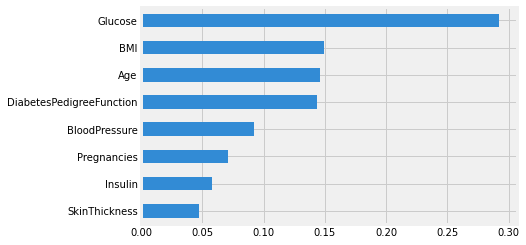

In [37]:
plots = interpreter.feature_importance.plot_feature_importance(im_model, ascending=False, progressbar=False)

### Gráficos de dependencia parcial con SKATER

[48/48] grid cells ████████████████████ Time elapsed: 2 seconds

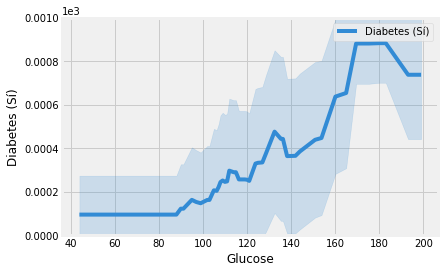

In [38]:
# Los gráficos PD también se pueden generar con la biblioteca SKATER
# Gráfico PD de 'Glucose' que afecta a la predicción del modelo

r = interpreter.partial_dependence.plot_partial_dependence(['Glucose'], im_model, grid_resolution=50, 
                                                           grid_range=(0,1), n_samples=1000, 
                                                           with_variance=True, figsize = (6, 4), n_jobs=-1)
yl = r[0][1].set_ylim(0, 1)

Existe una clara brecha para Glucosa = 130 +/- 10 en relación con el efecto de esta característica en la predicción de la probabilidad de que el paciente tenga Diabetes.

[50/50] grid cells ████████████████████ Time elapsed: 3 seconds

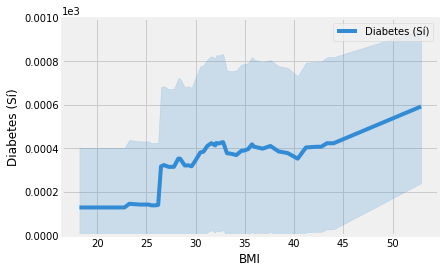

In [39]:
# Los gráficos PD también se pueden generar con la biblioteca SKATER
# Gráfico PD de 'Glucose' que afecta a la predicción del modelo

r = interpreter.partial_dependence.plot_partial_dependence(['BMI'], im_model, grid_resolution=50, 
                                                           grid_range=(0,1), n_samples=1000, 
                                                           with_variance=True, figsize = (6, 4), n_jobs=-1)
yl = r[0][1].set_ylim(0, 1)

### Gráfico PD bivariante que muestra las interacciones entre las características "Glucosa" y "Edad" y su efecto en el "Resultado".

[3977/3977] grid cells ████████████████████ Time elapsed: 22 secondsWall time: 23.5 s


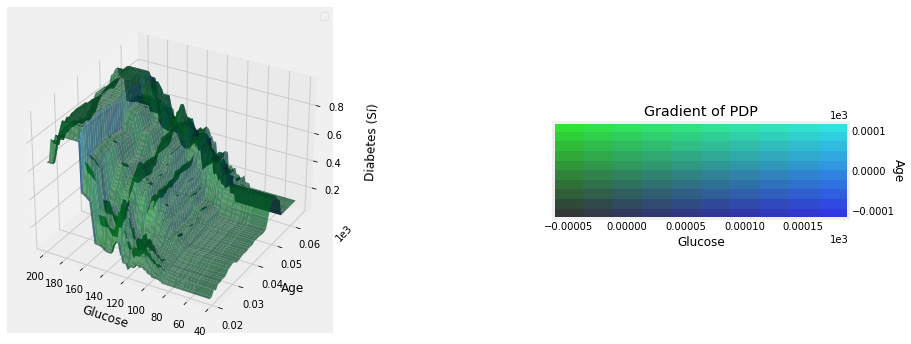

In [40]:
%%time
# beware : this process is computationally slow/heavy

plots_list = interpreter.partial_dependence.plot_partial_dependence([('Glucose', 'Age')], 
                                                                    im_model, grid_range=(0,1), 
                                                                    n_samples=1000,
                                                                    figsize=(16, 6),
                                                                    grid_resolution=100,
                                                                    progressbar=True,
                                                                    n_jobs=-1)

Aquí, si nos fijamos bien, podemos ver de nuevo el mismo efecto, podemos apreciar el efecto de la edad en conjunto con los niveles de glucosa en la predicción de diabetes.

### Interpretaciones locales con Skater
La interpretación local podría lograrse de dos maneras:

- En primer lugar, se podría aproximar el comportamiento de un modelo de predicción complejo en las proximidades de una única entrada utilizando un modelo auxiliar o sustituto sencillo e interpretable (por ejemplo, un regresor lineal).
- En segundo lugar, se podría utilizar el estimador base para comprender el comportamiento de una sola predicción utilizando funciones intuitivas aproximadas basadas en las entradas y salidas.

## Local Interpretable Model-Agnostic Explanations (LIME)
LIME es un algoritmo diseñado por Riberio Marco, Singh Sameer, Guestrin Carlos para acceder al comportamiento de cualquier estimador base (modelo) utilizando modelos sustitutos interpretables (por ejemplo, clasificador/regresor lineal).

Esta forma de evaluación global ayuda a generar explicaciones que son localmente fieles pero que pueden no alinearse con el comportamiento global.

Básicamente, las explicaciones LIME se basan en modelos sustitutos locales. Los modelos sustitutos son modelos interpretables (como un modelo lineal o un árbol de decisión) que se aprenden sobre las predicciones del modelo original de caja negra. Pero en lugar de intentar ajustar un modelo sustituto global, LIME se centra en ajustar modelos sustitutos locales para explicar por qué se hicieron predicciones individuales.

A continuación se presenta un flujo de trabajo estándar de alto nivel para esto:

- Elegir la instancia de interés para la que se desea tener una explicación de las predicciones del modelo de caja negra.
- Perturbar el conjunto de datos y obtener las predicciones de la caja negra para estos nuevos puntos.
- Ponderar las nuevas muestras por su proximidad a la instancia de interés.
- Ajustar un modelo ponderado e interpretable (sustituto) en el conjunto de datos con las variaciones.
- Explicar la predicción interpretando el modelo local.
- Recomendación: leer el capítulo de LIME en el excelente libro de Christoph Molnar sobre Interpretación de Modelos que habla de esto en detalle.

https://christophm.github.io/interpretable-ml-book/lime.html

#### Explicación de las predicciones del modelo con Skater usando LIME
Skater puede aprovechar LIME para explicar las predicciones del modelo. Normalmente, su clase LimeTabularExplainer ayuda a explicar las predicciones sobre datos tabulares (es decir, matriciales). Para las características numéricas, las perturba mediante el muestreo de una Normal(0,1) y la operación inversa de centrado y escalado de la media, según las medias y las estadísticas de los datos de entrenamiento. Para las características categóricas, las perturba mediante el muestreo de acuerdo con la distribución de entrenamiento, y haciendo una característica binaria que es 1 cuando el valor es el mismo que la instancia que se está explicando. La función explain_instance() genera explicaciones para una predicción. En primer lugar, generamos datos de vecindad perturbando aleatoriamente las características de la instancia. A continuación, aprendemos modelos lineales localmente ponderados (sustitutos) sobre estos datos de vecindad para explicar cada una de las clases de forma interpretable.

Dado que XGBoost tiene algunos problemas con el ordenamiento de los nombres de las características cuando se construyen modelos con marcos de datos, utilizaremos nuestro modelo xgb_array, aún ajustado, para que LIME funcione sin problemas adicionales de reordenamiento de características.

In [41]:
predictions = xgb_array.predict_proba(X_test.values)

In [42]:
from skater.core.local_interpretation.lime.lime_tabular import LimeTabularExplainer

exp = LimeTabularExplainer(X_test.values, feature_names=features_list, discretize_continuous=True, class_names=['Diabetes (No)', 'Diabetes (Sí)'])

##### Predicción cuando una observación es = 0 (Diabetes (No))

In [43]:
diabetes_nb = 100
print('Reference:', y_test.iloc[diabetes_nb])
print('Predicted:', predictions[diabetes_nb])
exp.explain_instance(X_test.iloc[diabetes_nb].values, xgb_array.predict_proba).show_in_notebook()

Reference: 0
Predicted: [0.9935488  0.00645118]


Podemos ver que este modelo ha tomado esta decisión en particular (99% de probabilidades de que este paciente sea calificado como de "baja probabilidad de tener diabetes") al plantear las características de "Glucose", "Age" podríamos saber en qué grado mirando los valores asociados.

##### Predicción cuando una observación es = 1 (Diabetes (Sí))

In [44]:
diabetes_nb = 3
print('Reference:', y_test.iloc[diabetes_nb])
print('Predicted:', predictions[diabetes_nb])
exp.explain_instance(X_test.iloc[diabetes_nb].values, xgb_array.predict_proba).show_in_notebook()

Reference: 1
Predicted: [0.07861328 0.9213867 ]


Podemos ver de nuevo que SKATER LIME ofrece una buena visualización que muestra qué características fueron las más influyentes para que el modelo tomara la decisión correcta de predecir el diagnóstico como diabetes.

## Interpretación del modelo con SHAP
Los valores de SHAP pueden explicar la salida de cualquier modelo de aprendizaje automático, pero para los modelos de conjunto complejos puede ser lento. SHAP tiene implementaciones en C++ que soportan los modelos de árbol XGBoost, LightGBM, CatBoost y scikit-learn.

SHAP (SHapley Additive exPlanations) asigna a cada característica un valor de importancia para una predicción concreta. Sus componentes novedosos incluyen: la identificación de una nueva clase de medidas de importancia de características aditivas, y resultados teóricos que muestran que hay una solución única en esta clase con un conjunto de propiedades deseables. Normalmente, los valores SHAP tratan de explicar la salida de un modelo (función) como una suma de los efectos de cada característica que se introduce en una expectativa condicional. En el caso de las funciones no lineales, es importante el orden en el que se introducen las características. Los valores SHAP son el resultado de la media de todos los ordenamientos posibles. Las pruebas de la teoría de juegos demuestran que éste es el único enfoque coherente posible.

Una forma intuitiva de entender el valor Shapley es la siguiente: Los valores de las características entran en una habitación en orden aleatorio. Todos los valores de características de la sala participan en el juego (= contribuyen a la predicción). El valor de Shapley ϕ𝑖𝑗 es la contribución marginal media del valor del rasgo 𝑥𝑖𝑗 uniendo los rasgos que ya han entrado en la sala antes, es decir



decir

$$\phi_{ij}=\sum_{\text{All.orderings}}val(\{\text{features.before.j}\}\cup{}x_{ij})-val(\{\text{features.before.j}\})$$
​
The following figure from the KDD 18 paper, [_Consistent Individualized Feature Attribution for Tree Ensembles_](https://arxiv.org/pdf/1802.03888.pdf) summarizes this in a nice way!
​
![](https://i.imgur.com/6Rc1dsa.png)


### Instalación

In [45]:
# pip install shap
import shap

# load JS visualization code to notebook
shap.initjs()

### Explicar las predicciones con SHAP

El valor de Shapley es la contribución media de las características que predicen en diferentes situaciones.

SHAP proporciona múltiples explicadores para diferentes tipos de modelos.

- Explicador de árbol: Soporta modelos XGBoost, LightGBM, CatBoost y scikit-learn mediante Tree SHAP.
- DeepExplainer (DEEP SHAP): Soporta modelos TensorFlow y Keras usando valores DeepLIFT y Shapley.
- GradientExplainer: Soporta modelos TensorFlow y Keras.
- KernelExplainer (Kernel SHAP): Aplicar a cualquier modelo mediante el uso de LIME y los valores de Shapley.

Para más información sobre las explicaciones de los valores de Shapley consulta el capítulo del libro de Christoph Molnar sobre los valores de Shapley https://christophm.github.io/interpretable-ml-book/shapley.html

Así que vamos a jugar con la implementación de Tree SHAP integrada en XGBoost para explicar el conjunto de datos de prueba.

In [46]:
# explicar las predicciones del modelo utilizando los valores SHAP
# (la misma sintaxis funciona para los modelos LightGBM, CatBoost y scikit-learn)
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)

In [47]:
X_shap = pd.DataFrame(shap_values)
X_shap.tail()

0         1         2         3         4         5         6  \
187 -0.307191  0.054691  0.710464 -0.226824  0.418899 -0.059311  0.646286   
188 -0.222110  1.424381 -0.237221  0.121873  0.196567  0.964800  0.260800   
189 -0.435644 -0.831760  0.223012 -0.139120 -0.521949 -2.197567  0.556280   
190  0.205635 -0.002642 -0.453331 -0.244391  0.188142 -3.815867  0.428771   
191 -0.002875 -2.497391 -0.603100 -0.183178  0.453909 -0.109990 -0.414263   

            7  
187 -0.092009  
188 -0.242279  
189 -1.797846  
190  1.603497  
191  0.434285

Obtenemos una matriz de valores SHAP con la misma forma que el conjunto X_test original. Cada fila suma la diferencia entre el resultado del modelo para esa muestra y el valor esperado del resultado del modelo (que se almacena como atributo expected_value del explicador). Normalmente, esta diferencia nos ayuda a explicar por qué el modelo se inclina en la predicción de un resultado de clase específico.

In [48]:
print('Expected Value: ', explainer.expected_value)

Expected Value:  -0.7649715


### Importancia de las características con SHAP
Básicamente, se toma la media de las magnitudes de los valores SHAP en el conjunto de datos y se traza como un simple gráfico de barras.

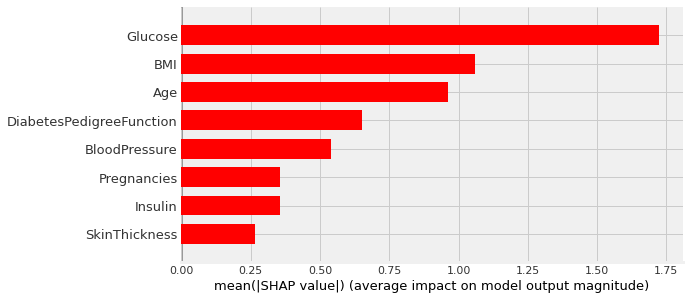

In [49]:
shap.summary_plot(shap_values, X_test, plot_type="bar", color='red')

##### Predicción cuando una observación es = 0 (Diabetes (No))

In [50]:
shap.force_plot(explainer.expected_value, shap_values[100,:], X_test.iloc[100,:])

##### Predicción cuando una observación es = 1 (Diabetes (Sí))

In [51]:
shap.force_plot(explainer.expected_value, shap_values[3,:], X_test.iloc[3,:])

SHAP ofrece un buen razonamiento que muestra qué características fueron las más influyentes para que el modelo tomara la decisión correcta de predecir si el paciente fue calificado con posibilidad baja o alta de diabetes. La explicación anterior muestra las características que contribuyen a impulsar el resultado del modelo desde el "valor base" (el resultado medio del modelo sobre el conjunto de datos de entrenamiento que pasamos) hasta el resultado real del modelo.

Y ahora algún gráfico más elaborado...

In [52]:
shap.force_plot(explainer.expected_value, shap_values[:1000,:], X_test.iloc[:1000,:])

Se puede interactuar con la visualización anterior de múltiples maneras. La visualización muestra, por ejemplo, algunas decisiones interesantes sobre el patrón de predicción del modelo. Por ejemplo:

- Las primeras 60 muestras de prueba se clasifican probablemente como posible diabetes y tienen un alto grado de glucosa (> 150) que puede destacarse eligiendo en el menú de la izquierda "efectos de la glucosa".
- Si se despliega la función 'glucosa' con el menú desplegable superior, se puede confirmar que el grado de glucosa empieza a desempeñar un papel importante a la hora de hacer subir la predicción a un nivel cercano a 130.
- para 'BMI', podemos confirmar un cambio de comportamiento del modelo a partir de 45.

#### SHAP Summary Plot

Un valor SHAP para una característica de una predicción específica representa cuánto cambia la predicción del modelo cuando observamos esa característica.

SHAP también nos permite utilizar un gráfico de dispersión de densidad de los valores SHAP para cada característica para identificar el impacto que tiene cada característica en el resultado del modelo para los individuos del conjunto de datos. Las características se clasifican por la suma de las magnitudes de los valores SHAP en todas las muestras.

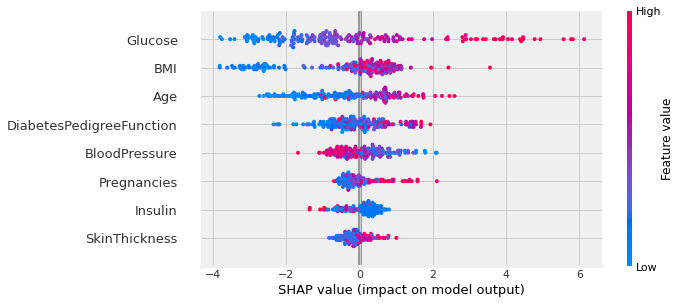

In [53]:
shap.summary_plot(shap_values, X_test)

Es interesante confirmar de nuevo que los valores elevados de "glucosa" desempeñan un papel importante y positivo en la predicción final, y que los valores elevados de "edad" parecen tener un impacto negativo en la predicción de diagnóstico de diabetes negativo.

#### SHAP Gráficos de dependencia
Podemos utilizar el método dependence_plot para trazar el efecto de una característica en la predicción con o sin la influencia de otra característica. Si no da ningún parámetro interaction_index, SHAP decidirá por sí mismo y propondrá automáticamente una característica de interacción.

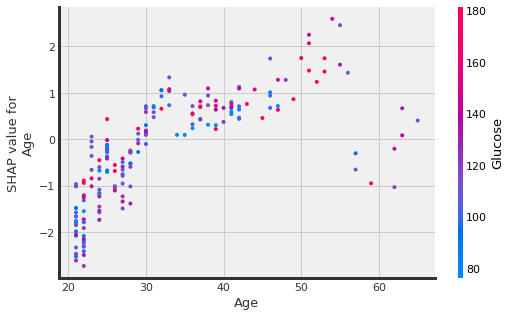

In [54]:
shap.dependence_plot(ind='Age', interaction_index='Glucose',
                     shap_values=shap_values, 
                     features=X_test,  
                     display_features=X_test)

## FairML

FairML es una nueva biblioteca de Python que audita modelos predictivos de caja negra. La idea básica de FairML (y de muchos otros intentos de auditar o interpretar el comportamiento de los modelos) es medir la dependencia de un modelo de sus entradas cambiándolas. Si un pequeño cambio en una característica de entrada cambia drásticamente la salida, el modelo es sensible a la característica.

¿Pero qué ocurre si los atributos de entrada están correlacionados?

El truco utilizado aquí para contrarrestar esta multicolinealidad es la proyección ortogonal. FairML proyecta ortogonalmente la entrada para medir la dependencia del modelo predictivo de cada atributo. La proyección ortogonal de los vectores es importante porque nos permite eliminar completamente la dependencia lineal entre los atributos. Si dos vectores son ortogonales entre sí, ninguna transformación lineal de un vector puede producir el otro. Esta intuición es la base de la medida de dependencia de las características.

Una ventaja de FairML es que puede auditar cualquier clasificador o regresor. FairML sólo requiere que tenga una función de predicción.

https://github.com/adebayoj/fairml

In [55]:
# pip install https://github.com/adebayoj/fairml/archive/master.zip

from fairml import audit_model
from fairml import plot_dependencies

In [56]:
%%time

xgb_fair = XGBClassifier(objective='binary:logistic', random_state=33, n_jobs=-1)

xgb_fair.fit(X_train.values, y_train, eval_metric = 'logloss')

Wall time: 67.7 ms


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=33,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Ahora, importamos los dos métodos clave de fairml. audit_model toma:

- (requerido) la función black-box, que es el modelo a auditar

- (requerido) sample_data para ser perturbado para consultar la función. Tiene que ser un dataframe de pandas sin datos perdidos.

- otros parámetros opcionales que controlan la mecánica del proceso de auditoría, por ejemplo:

    - number_of_runs : número de iteraciones a realizar
    - interacciones : bandera para permitir la comprobación de la dependencia del modelo en las interacciones.

audit_model devuelve un diccionario sobrecargado donde las claves son los nombres de las columnas del dataframe de pandas de entrada y los valores son listas que contienen la dependencia del modelo en esa característica en particular. Estas listas de tamaño number_of_runs.

In [57]:
%%time

# call audit model
feat_importances, _ = audit_model(xgb_fair.predict, X_train, distance_metric='accuracy', direct_input_pertubation_strategy='constant-zero',
                                 number_of_runs=50, include_interactions=True)

# print feature importance
print(feat_importances)

Feature: Pregnancies,	 Importance: 0.71875
Feature: Glucose,	 Importance: 0.6423611111111112
Feature: BloodPressure,	 Importance: -0.6423611111111112
Feature: SkinThickness,	 Importance: 0.6423611111111112
Feature: Insulin,	 Importance: -0.6458333333333334
Feature: BMI,	 Importance: 0.6423611111111112
Feature: DiabetesPedigreeFunction,	 Importance: 0.6475694444444444
Feature: Age,	 Importance: -0.6423611111111112
Wall time: 498 ms


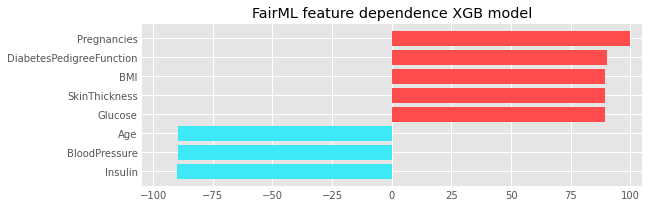

In [58]:
# generar un gráfico de dependencia de características
fig = plot_dependencies(
    feat_importances.median(),
    reverse_values=False,
    title="FairML feature dependence XGB model",
    fig_size=(8,3)
    )

# Imprimir a fichero
#file_name = "img/fairml_diabetes.png"
#plt.savefig(file_name, transparent=False, bbox_inches='tight', dpi=250)

El color rojo indica que el factor contribuye en gran medida a la predicción del modelo.

Puedes jugar con los diferentes parámetros como la bandera include_interactions o con direct_input_pertubation_strategy refiriéndose a cómo poner a cero una sola variable con tres opciones diferentes:

- 'constant-zero': reemplazar con un valor constante aleatorio
- 'constant-median': reemplaza con un valor constante mediano
- 'random-sample': reemplaza todos los valores con una permutación aleatoria de la columna